<a href="https://colab.research.google.com/github/GRTO/DiplomadoPucp/blob/master/cars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount("/content/gdrive")
%cd gdrive/My\ Drive/'Colab Notebooks'/'Data mining'/'Clase 2/'
!ls

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive
/content/gdrive/My Drive/Colab Notebooks/Data mining/Clase 2
 cars.csv     film.csv			'MetalsInRivers GB.xlsx'
 cars.ipynb   FullSwainsoniDataset.txt	 TimeUse.csv


In [0]:
import numpy as np
import pandas as pd
import seaborn as sns

In [0]:
df = pd.read_csv('cars.csv', sep=";", encoding = "utf-8");
df.head()

,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
0,STRING,DOUBLE,INT,DOUBLE,DOUBLE,DOUBLE,DOUBLE,INT,CAT
1,Chevrolet Chevelle Malibu,18.0,8,307.0,130.0,3504.,12.0,70,US
2,Buick Skylark 320,15.0,8,350.0,165.0,3693.,11.5,70,US
3,Plymouth Satellite,18.0,8,318.0,150.0,3436.,11.0,70,US
4,AMC Rebel SST,16.0,8,304.0,150.0,3433.,12.0,70,US


In [0]:
df.drop(axis=0, index=0, inplace=True)

# Lectura de los datos

In [0]:
df.head()

,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
1,Chevrolet Chevelle Malibu,18.0,8,307.0,130.0,3504.,12.0,70,US
2,Buick Skylark 320,15.0,8,350.0,165.0,3693.,11.5,70,US
3,Plymouth Satellite,18.0,8,318.0,150.0,3436.,11.0,70,US
4,AMC Rebel SST,16.0,8,304.0,150.0,3433.,12.0,70,US
5,Ford Torino,17.0,8,302.0,140.0,3449.,10.5,70,US


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406 entries, 1 to 406
Data columns (total 9 columns):
Car             406 non-null object
MPG             406 non-null object
Cylinders       406 non-null object
Displacement    406 non-null object
Horsepower      406 non-null object
Weight          406 non-null object
Acceleration    406 non-null object
Model           406 non-null object
Origin          406 non-null object
dtypes: object(9)
memory usage: 31.7+ KB


In [0]:
df.describe().T

,count,unique,top,freq
Car,406,308,Toyota Corolla,9
MPG,406,130,13.0,20
Cylinders,406,5,4,207
Displacement,406,83,97.00,22
Horsepower,406,94,150.0,22
Weight,406,356,2130.,4
Acceleration,406,97,14.5,23
Model,406,13,73,40
Origin,406,3,US,254


# Objeto de estudio

**Objeto de estudio:** auto y sus caracteristicas

# Data temporal

Dato temporal: No hay

# Pretratamiento de la data y visualizacion de indicadores

In [0]:
#Verificamos is existen datos null
df.isnull().sum()

Car             0
MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model           0
Origin          0
dtype: int64

In [0]:
# Existen 308 valores unicos de autos, hay 406 columnas, por lo tanto hay valores repetidos
len(df.Car.unique())

308

In [0]:
df[df.duplicated(['Car'], keep=False)].sort_values(by=['Car'])

,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
323,AMC Concord,24.3,4,151.0,90.00,3003.,20.1,80,US
265,AMC Concord,19.4,6,232.0,90.00,3210.,17.2,78,US
177,AMC Gremlin,20.0,6,232.0,100.0,2914.,16.0,75,US
115,AMC Gremlin,18.0,6,232.0,100.0,2789.,15.0,73,US
41,AMC Gremlin,19.0,6,232.0,100.0,2634.,13.0,71,US
31,AMC Gremlin,21.0,6,199.0,90.00,2648.,15.0,70,US
107,AMC Hornet,18.0,6,232.0,100.0,2945.,16.0,73,US
135,AMC Hornet,19.0,6,232.0,100.0,2901.,16.0,74,US
23,AMC Hornet,18.0,6,199.0,97.00,2774.,15.5,70,US
202,AMC Hornet,22.5,6,232.0,90.00,3085.,17.6,76,US


In [0]:
# por lo tanto crearemos un modelo, carro mas modelo, para poder diferenciar los tipos de autos
df['Car and Model and MPG'] = df[['Car', 'Model', 'MPG']].apply(
    lambda x: ' - '.join(x.dropna().astype(str)),
    axis=1
)

In [0]:
df.head()

,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin,Car and Model and MPG
1,Chevrolet Chevelle Malibu,18.0,8,307.0,130.0,3504.,12.0,70,US,Chevrolet Chevelle Malibu - 70 - 18.0
2,Buick Skylark 320,15.0,8,350.0,165.0,3693.,11.5,70,US,Buick Skylark 320 - 70 - 15.0
3,Plymouth Satellite,18.0,8,318.0,150.0,3436.,11.0,70,US,Plymouth Satellite - 70 - 18.0
4,AMC Rebel SST,16.0,8,304.0,150.0,3433.,12.0,70,US,AMC Rebel SST - 70 - 16.0
5,Ford Torino,17.0,8,302.0,140.0,3449.,10.5,70,US,Ford Torino - 70 - 17.0


In [0]:
len(df['Car and Model and MPG'].unique())

406

Ahora si podemos diferenciar las distintas caracteristicas de los autos, ya que hemos podido separarlos

# Indicadores

1. **Indicador**: Numero de cilindros por carro

In [0]:
df.Cylinders.value_counts()

4    207
8    108
6     84
3      4
5      3
Name: Cylinders, dtype: int64

[Text(0, 0.5, 'N° cars'), Text(0.5, 0, 'Cylinders')]

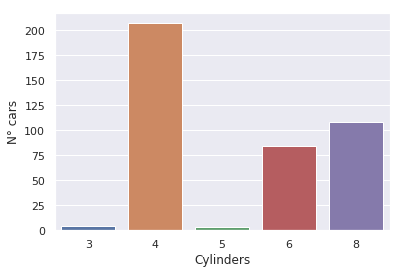

In [0]:
import seaborn as sns
sns.set(style="darkgrid")
ax = sns.countplot(x="Cylinders", data=df)
ax.set(xlabel='Cylinders', ylabel='N° cars')

2. **Indicador**: Autos con mas de un modelo


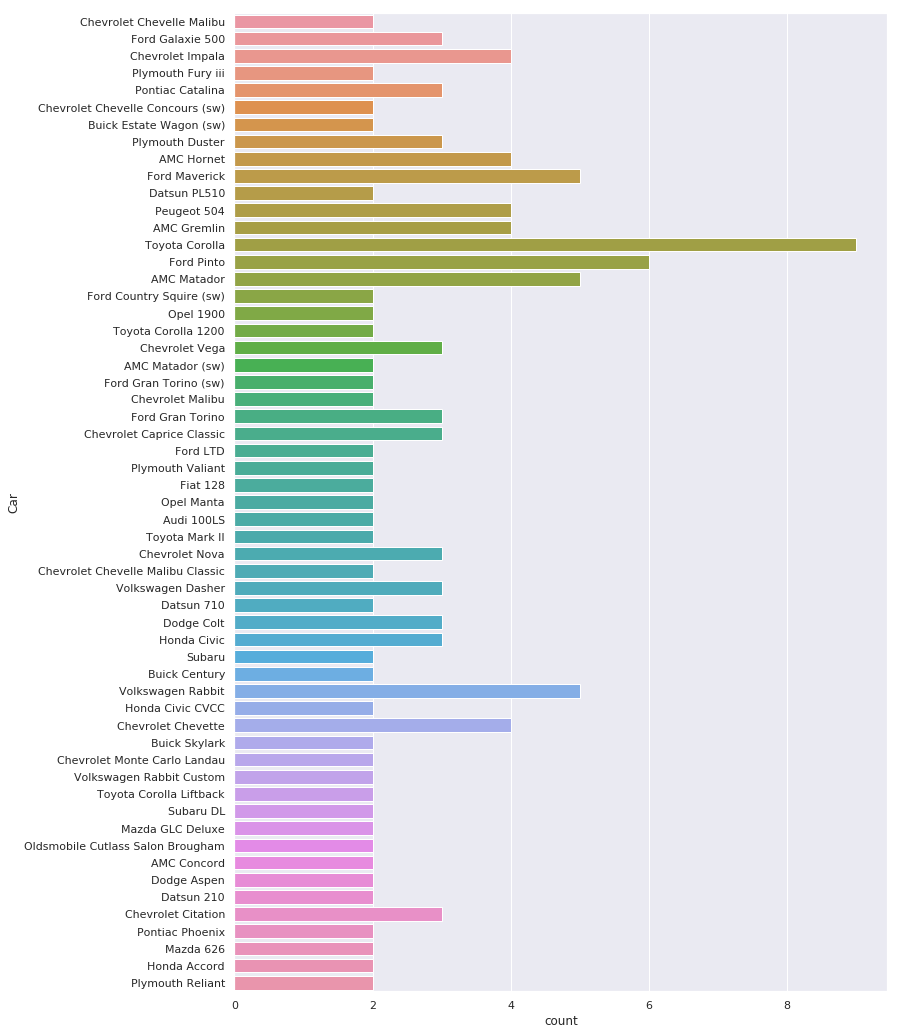

In [0]:
sns.set(rc={'figure.figsize':(11.7,18)})
duplicated_models = df[df.duplicated(['Car'], keep=False)]
ax = sns.countplot(y="Car", data=duplicated_models)

3. **Indicador:** Indicador de los mejores 10 carros segun sus caballos de fuerza

In [0]:
df.Horsepower = df.Horsepower.astype(float)
topTenHorsePower = df.nlargest(10, 'Horsepower')
topTenHorsePower = topTenHorsePower[['Horsepower', 'Car']]

In [0]:
topTenHorsePower

,Horsepower,Car
124,230.0,Pontiac Grand Prix
9,225.0,Pontiac Catalina
20,225.0,Buick Estate Wagon (sw)
103,225.0,Buick Electra 225 Custom
7,220.0,Chevrolet Impala
8,215.0,Plymouth Fury iii
32,215.0,Ford F250
102,215.0,Chrysler New Yorker Brougham
34,210.0,Dodge D200
75,208.0,Mercury Marquis


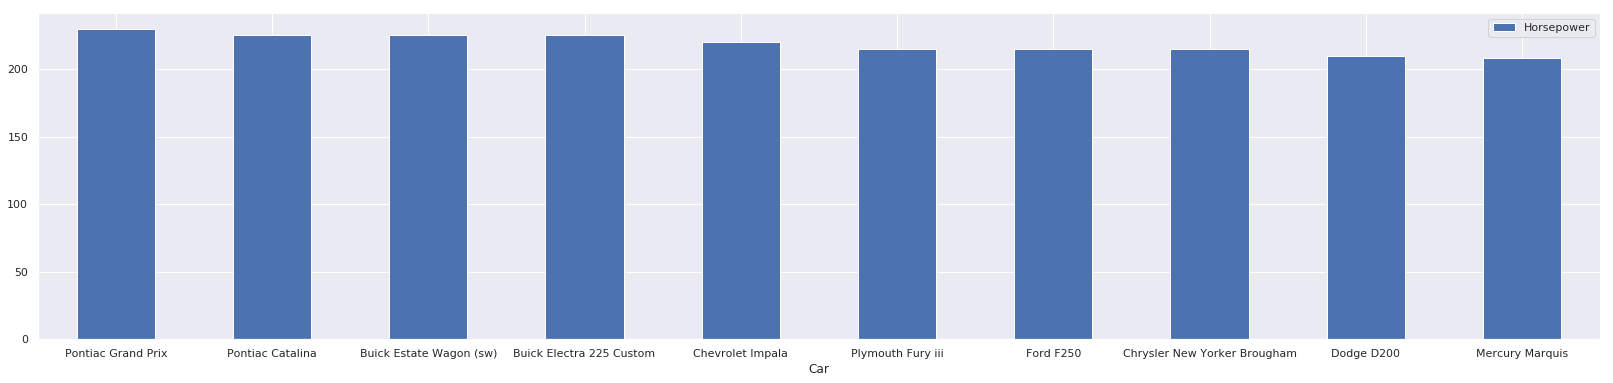

In [0]:
topTenHorsePower.plot.bar(x='Car', y='Horsepower', rot=0, width=0.5, figsize=(28, 6))